In [20]:
#Dependencies
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [26]:
#Read the clean csv file from the Output folder
clean_data = pd.read_csv("../Output/clean_realtor_data.csv")
clean_data = clean_data.drop("STATUS", axis=1)
clean_data = clean_data.drop("Unnamed: 0", axis=1)
clean_data.reset_index()


,index,PRICE,BED,BATH,ACRE LOT,FULL ADDRESS,STREET,CITY,STATE,HOUSE SIZE,ZIP
0,0,149900.0,1.0,1.0,0.26,"Bo Espinal Carr # 442, Aguada, PR, 00602",Bo Espinal Carr # 442,Aguada,Puerto Rico,2100.0,602
1,1,180000.0,2.0,2.0,0.24,"4417 Br, Aguada, PR, 00602",4417 Br,Aguada,Puerto Rico,1138.0,602
2,2,90000.0,2.0,1.0,0.07,"A-18 Condominio Los Almendros, Aguada, PR, 00602",A-18 Condominio Los Almendros,Aguada,Puerto Rico,813.0,602
3,3,10000000.0,6.0,5.0,0.12,"441 Bo Carrizal Km 2 6 Unit 4, Aguada, PR, 00602",441 Bo Carrizal Km 2 6 Unit 4,Aguada,Puerto Rico,6000.0,602
4,4,600000.0,6.0,5.0,0.10,"Pr, Aguada, PR, 00602",Pr,Aguada,Puerto Rico,2400.0,602
...,...,...,...,...,...,...,...,...,...,...,...
6298,6298,191000.0,3.0,1.0,0.10,"305 Sheridan Dr, New Castle, DE, 19720",305 Sheridan Dr,New Castle,Delaware,1025.0,19720
6299,6299,210000.0,3.0,1.0,0.04,"442 Geddes St, Wilmington, DE, 19805",442 Geddes St,Wilmington,Delaware,825.0,19805
6300,6300,4649000.0,28.0,22.0,0.15,"239-241 Main St Unit 10, Staten Island, NY, 10307",239-241 Main St Unit 10,Staten Island,New York,12825.0,10307
6301,6301,235000.0,2.0,2.0,0.14,"1101 Stoneridge Cir Unit 1101, Helmetta, NJ, 0...",1101 Stoneridge Cir Unit 1101,Helmetta,New Jersey,1198.0,8828


In [34]:
#Create a function to fix zip_code from float and 3 digits to string 
def fix_zip(series):
    return series.astype(str).str.extract('(\d+)', expand=False).str.zfill(5)

clean_data["ZIP Code"] = fix_zip(clean_data["ZIP"])
del clean_data["ZIP"]
clean_data.head()

,PRICE,BED,BATH,ACRE LOT,FULL ADDRESS,STREET,CITY,STATE,HOUSE SIZE,ZIP Code
0,149900.0,1.0,1.0,0.26,"Bo Espinal Carr # 442, Aguada, PR, 00602",Bo Espinal Carr # 442,Aguada,Puerto Rico,2100.0,00602
1,180000.0,2.0,2.0,0.24,"4417 Br, Aguada, PR, 00602",4417 Br,Aguada,Puerto Rico,1138.0,00602
2,90000.0,2.0,1.0,0.07,"A-18 Condominio Los Almendros, Aguada, PR, 00602",A-18 Condominio Los Almendros,Aguada,Puerto Rico,813.0,00602
3,10000000.0,6.0,5.0,0.12,"441 Bo Carrizal Km 2 6 Unit 4, Aguada, PR, 00602",441 Bo Carrizal Km 2 6 Unit 4,Aguada,Puerto Rico,6000.0,00602
4,600000.0,6.0,5.0,0.10,"Pr, Aguada, PR, 00602",Pr,Aguada,Puerto Rico,2400.0,00602


In [35]:
#Sorting the top 10 most expensive homes by zip codes in this Eastern Region Real Estate Dataset
expensive_zip = clean_data.sort_values("PRICE",ascending=False)
expensive_zip.head(10)

,PRICE,BED,BATH,ACRE LOT,FULL ADDRESS,STREET,CITY,STATE,HOUSE SIZE,ZIP Code
3833,49900000.0,5.0,7.0,3.43,"25 Columbus Cir Ph 80, New York City, NY, 10019",25 Columbus Cir Ph 80,New York City,New York,8274.0,10019
2985,45000000.0,16.0,21.0,0.10,"217-219 W Broadway, New York City, NY, 10013",217-219 W Broadway,New York City,New York,29363.0,10013
2813,42500000.0,5.0,8.0,0.54,"293 Lafayette St Ph 1, New York City, NY, 10012",293 Lafayette St Ph 1,New York City,New York,7241.0,10012
2255,39000000.0,8.0,13.0,8.23,"555 Lake Ave, Greenwich, CT, 06830",555 Lake Ave,Greenwich,Connecticut,18954.0,06830
2684,34990000.0,7.0,13.0,5.31,"15 Dairy Rd, Greenwich, CT, 06830",15 Dairy Rd,Greenwich,Connecticut,16359.0,06830
2599,32000000.0,6.0,12.0,10.00,"16 Hurlingham Dr, Greenwich, CT, 06831",16 Hurlingham Dr,Greenwich,Connecticut,23700.0,06831
2382,30000000.0,11.0,11.0,6.38,"30 Field Point Dr, Greenwich, CT, 06830",30 Field Point Dr,Greenwich,Connecticut,18068.0,06830
2508,29997000.0,7.0,13.0,17.20,"591 Riversville Rd, Greenwich, CT, 06831",591 Riversville Rd,Greenwich,Connecticut,13343.0,06831
3826,29975000.0,7.0,9.0,0.05,"10 E 76th St, New York City, NY, 10021",10 E 76th St,New York City,New York,12380.0,10021
2550,28000000.0,5.0,9.0,87.00,"7-11 Old Stagecoach Rd, Ridgefield, CT, 06877",7-11 Old Stagecoach Rd,Ridgefield,Connecticut,12259.0,06877


In [36]:
#Sorting the top 10 most expensive homes by zip codes in this Eastern Region Real Estate Dataset
cheap_zip = clean_data.sort_values("PRICE")
cheap_zip.head(10)

,PRICE,BED,BATH,ACRE LOT,FULL ADDRESS,STREET,CITY,STATE,HOUSE SIZE,ZIP Code
5497,16000.0,2.0,1.0,0.04,"1405 Farrell Ave Trlr 327, Cherry Hill, NJ, 08002",1405 Farrell Ave Trlr 327,Cherry Hill,New Jersey,684.0,08002
5861,21000.0,2.0,2.0,0.00,"8 Cedarwood Dr, Pittsgrove, NJ, 08318",8 Cedarwood Dr,Pittsgrove,New Jersey,1027.0,08318
4770,24888.0,1.0,1.0,0.10,"114 Mallard Ln, Shohola, PA, 18458",114 Mallard Ln,Shohola,Pennsylvania,600.0,18458
6272,25000.0,2.0,2.0,0.09,"28 Dogwood Ln, Pittsgrove, NJ, 08318",28 Dogwood Ln,Pittsgrove,New Jersey,980.0,08318
1058,26000.0,3.0,1.0,0.14,"8 Lincoln St, Brownville, ME, 04414",8 Lincoln St,Brownville,Maine,1200.0,04414
1057,26500.0,6.0,1.0,1.60,"58 Stickney Hill Rd, Brownville, ME, 04414",58 Stickney Hill Rd,Brownville,Maine,1906.0,04414
4971,28000.0,1.0,1.0,0.07,"145 Aztec Dr, Shohola, PA, 18458",145 Aztec Dr,Shohola,Pennsylvania,750.0,18458
213,31000.0,3.0,2.0,0.05,"Mariano Martorel Lot 20, Yabucoa, PR, 00767",Mariano Martorel Lot 20,Yabucoa,Puerto Rico,960.0,00767
5960,34900.0,3.0,2.0,0.15,"329 Keasbey St, Salem, NJ, 08079",329 Keasbey St,Salem,New Jersey,2056.0,08079
5714,35900.0,3.0,1.0,2.25,"216 Mannington Yorketown Rd, Woodstown, NJ, 08098",216 Mannington Yorketown Rd,Woodstown,New Jersey,1170.0,08098


In [43]:
#Number of properties for sale by state
state_count = clean_data["STATE"].value_counts()
state_count

New York          1993
New Jersey        1543
Connecticut       1035
Puerto Rico        454
Maine              428
Pennsylvania       330
Delaware           251
Rhode Island       199
Massachusetts       62
New Hampshire        4
Vermont              3
Virgin Islands       1
Name: STATE, dtype: int64

In [44]:
#Sorting the Data by one state in this case New York to see if we can make sense of the data
ny_data = clean_data.loc[clean_data["STATE"] == "New York"]
ny_data.head()

,PRICE,BED,BATH,ACRE LOT,FULL ADDRESS,STREET,CITY,STATE,HOUSE SIZE,ZIP Code
456,40000.0,2.0,1.0,0.20,"423 Morey Park Hill Rd, Nassau, NY, 12123",423 Morey Park Hill Rd,Nassau,New York,690.0,12123
457,429900.0,4.0,3.0,2.15,"43 Plum Tree Dr, Valatie, NY, 12184",43 Plum Tree Dr,Valatie,New York,2248.0,12184
458,299900.0,3.0,1.0,0.32,"14 Evelyn Ln, Niverville, NY, 12130",14 Evelyn Ln,Niverville,New York,1608.0,12130
459,299900.0,3.0,1.0,0.32,"14 Evelyn Ln, Kinderhook, NY, 12106",14 Evelyn Ln,Kinderhook,New York,1608.0,12106
461,105000.0,4.0,2.0,22.52,"71 Lords Hill Rd, Nassau, NY, 12123",71 Lords Hill Rd,Nassau,New York,1795.0,12123


In [45]:
#Sorting the Data by one state in this case New Jersey to see if we can make sense of the data
nj_data = clean_data.loc[clean_data["STATE"] == "New Jersey"]
nj_data.head()

,PRICE,BED,BATH,ACRE LOT,FULL ADDRESS,STREET,CITY,STATE,HOUSE SIZE,ZIP Code
2678,399000.0,3.0,3.0,0.06,"1188 Rahway Ave, Avenel, NJ, 07001",1188 Rahway Ave,Avenel,New Jersey,1476.0,07001
2713,1495000.0,3.0,2.0,0.12,"192 W 31st St, Bayonne, NJ, 07002",192 W 31st St,Bayonne,New Jersey,1104.0,07002
2714,155000.0,1.0,1.0,0.04,"15 Broadway Apt 43, Bayonne, NJ, 07002",15 Broadway Apt 43,Bayonne,New Jersey,400.0,07002
2743,459900.0,3.0,2.0,0.08,"387 Lawton Ave, Cliffside Park, NJ, 07010",387 Lawton Ave,Cliffside Park,New Jersey,1463.0,07010
2744,249000.0,3.0,2.0,4.75,"2200 N Central Rd Apt 5L, Fort Lee, NJ, 07024",2200 N Central Rd Apt 5L,Fort Lee,New Jersey,1900.0,07024


In [46]:
#Sorting the Data by one state in this case Connecticut to see if we can make sense of the data
ct_data = clean_data.loc[clean_data["STATE"] == "Connecticut"]
ct_data.head()

,PRICE,BED,BATH,ACRE LOT,FULL ADDRESS,STREET,CITY,STATE,HOUSE SIZE,ZIP Code
455,279900.0,3.0,2.0,0.35,"11 Schenone Ct, Plainville, CT, 06062",11 Schenone Ct,Plainville,Connecticut,1004.0,06062
527,994900.0,4.0,4.0,2.01,"14 Laureate Dr, Middletown, CT, 06457",14 Laureate Dr,Middletown,Connecticut,4952.0,06457
528,340000.0,4.0,3.0,1.20,"127 Main St, Durham, CT, 06422",127 Main St,Durham,Connecticut,3213.0,06422
529,409900.0,8.0,3.0,0.22,"254 Corbin Ave, New Britain, CT, 06052",254 Corbin Ave,New Britain,Connecticut,2913.0,06052
530,349900.0,3.0,3.0,0.50,"63 Lenti Ter, Glastonbury, CT, 06033",63 Lenti Ter,Glastonbury,Connecticut,1300.0,06033


In [47]:
#Sorting the Data by one state in this case Puerto Rico to see if we can make sense of the data
pr_data = clean_data.loc[clean_data["STATE"] == "Puerto Rico"]
pr_data.head()

,PRICE,BED,BATH,ACRE LOT,FULL ADDRESS,STREET,CITY,STATE,HOUSE SIZE,ZIP Code
0,149900.0,1.0,1.0,0.26,"Bo Espinal Carr # 442, Aguada, PR, 00602",Bo Espinal Carr # 442,Aguada,Puerto Rico,2100.0,00602
1,180000.0,2.0,2.0,0.24,"4417 Br, Aguada, PR, 00602",4417 Br,Aguada,Puerto Rico,1138.0,00602
2,90000.0,2.0,1.0,0.07,"A-18 Condominio Los Almendros, Aguada, PR, 00602",A-18 Condominio Los Almendros,Aguada,Puerto Rico,813.0,00602
3,10000000.0,6.0,5.0,0.12,"441 Bo Carrizal Km 2 6 Unit 4, Aguada, PR, 00602",441 Bo Carrizal Km 2 6 Unit 4,Aguada,Puerto Rico,6000.0,00602
4,600000.0,6.0,5.0,0.10,"Pr, Aguada, PR, 00602",Pr,Aguada,Puerto Rico,2400.0,00602


The r-squared is: 0.3014051520078212


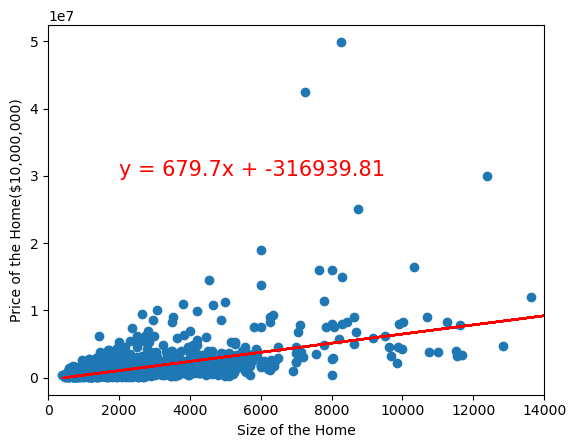

In [48]:
#scatter plot of Size of House vs price State of New York
x_values = ny_data["HOUSE SIZE"]
y_values = ny_data["PRICE"]
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+str(round(slope,2)) + "x + "+ str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2000,30000000),fontsize=15,color="red")
plt.xlabel("Size of the Home")
plt.ylabel("Price of the Home($10,000,000)")
plt.xlim(0,14000)
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.155183830860985


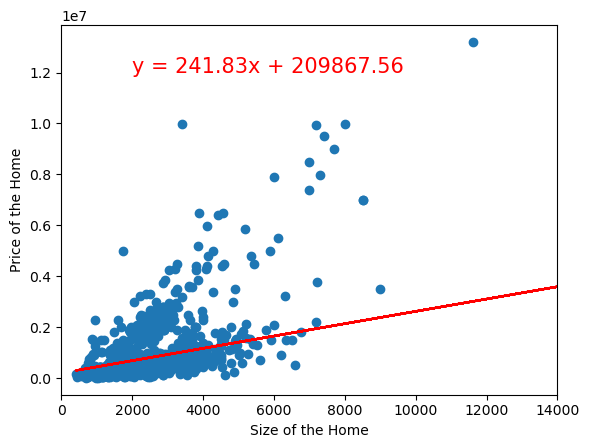

In [49]:
#scatter plot of Size of House vs price State of New Jersey
x_values = nj_data["HOUSE SIZE"]
y_values = nj_data["PRICE"]
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+str(round(slope,2)) + "x + "+ str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2000,12000000),fontsize=15,color="red")
plt.xlabel("Size of the Home")
plt.ylabel("Price of the Home")
plt.xlim(0,14000)
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.6319639467202537


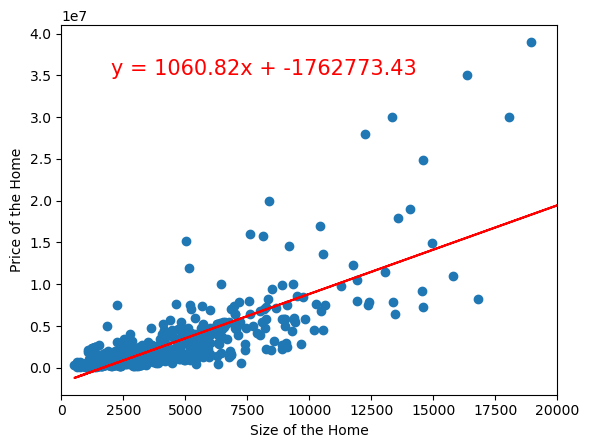

In [50]:
#scatter plot of Size of House vs price State of Connecticut
x_values = ct_data["HOUSE SIZE"]
y_values = ct_data["PRICE"]
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+str(round(slope,2)) + "x + "+ str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2000,35000000),fontsize=15,color="red")
plt.xlabel("Size of the Home")
plt.ylabel("Price of the Home")
plt.xlim(0,20000)
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.019648074867199574


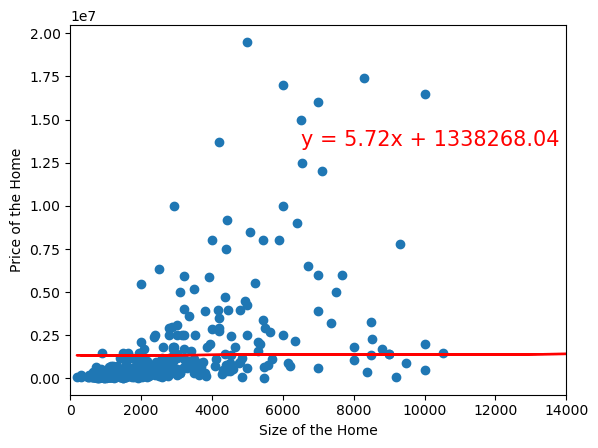

In [51]:
#scatter plot of Size of House vs price territory of Puerto Rico
x_values = pr_data["HOUSE SIZE"]
y_values = pr_data["PRICE"]
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+str(round(slope,2)) + "x + "+ str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6500,13500000),fontsize=15,color="red")
plt.xlabel("Size of the Home")
plt.ylabel("Price of the Home")
plt.xlim(0,14000)
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.06261939011322772


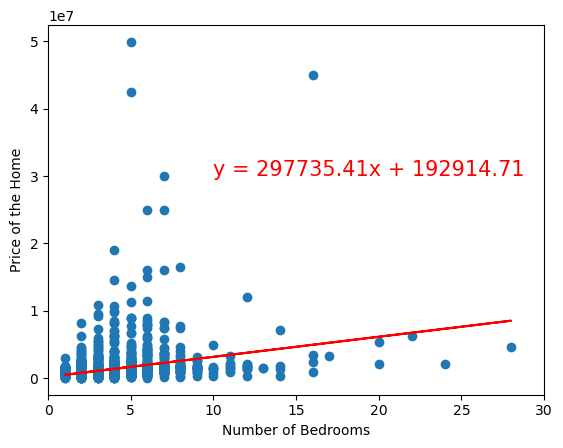

In [52]:
#scatter plot of Number of bedrooms vs price State of New York
x_values = ny_data["BED"]
y_values = ny_data["PRICE"]
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+str(round(slope,2)) + "x + "+ str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30000000),fontsize=15,color="red")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price of the Home")
plt.xlim(0,30)
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.2335417845241524


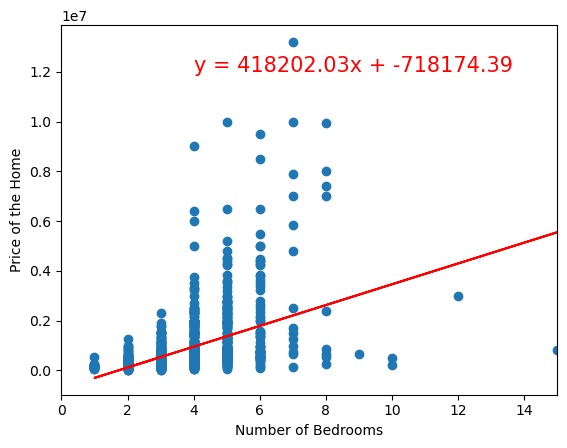

In [53]:
#scatter plot of Number of bedrooms vs price State of New Jersey
x_values = nj_data["BED"]
y_values = nj_data["PRICE"]
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+str(round(slope,2)) + "x + "+ str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,12000000),fontsize=15,color="red")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price of the Home")
plt.xlim(0,15)
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.27876258026798306


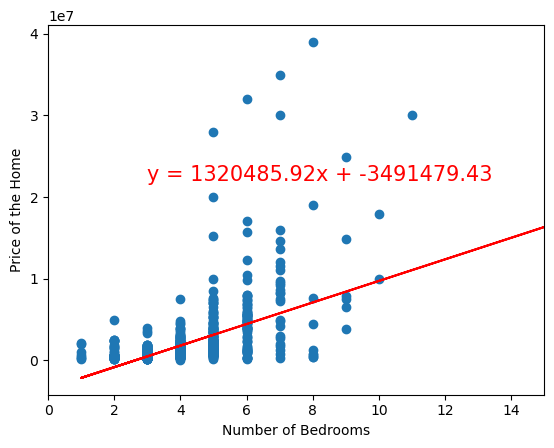

In [54]:
#scatter plot of Number of bedrooms vs price State of Connecticut
x_values = ct_data["BED"]
y_values = ct_data["PRICE"]
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+str(round(slope,2)) + "x + "+ str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,22000000),fontsize=15,color="red")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price of the Home")
plt.xlim(0,15)
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.13003715378191633


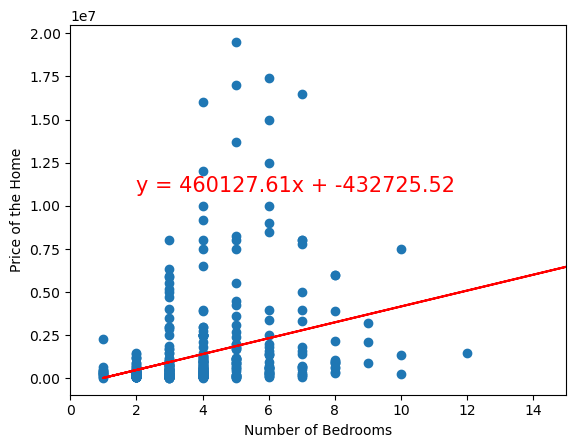

In [55]:
#scatter plot of Number of bedrooms vs price in the territory of Puerto Rico
x_values = pr_data["BED"]
y_values = pr_data["PRICE"]
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+str(round(slope,2)) + "x + "+ str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,10800000),fontsize=15,color="red")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price of the Home")
plt.xlim(0,15)
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 2.496218560295859e-07


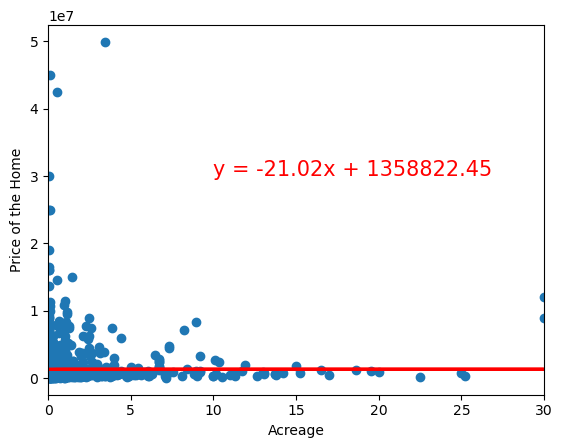

In [56]:
#scatter plot of Acre Lot vs price State of New York
x_values = ny_data["ACRE LOT"]
y_values = ny_data["PRICE"]
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+str(round(slope,2)) + "x + "+ str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30000000),fontsize=15,color="red")
plt.xlabel("Acreage")
plt.ylabel("Price of the Home")
plt.xlim(0,30)
print(f"The r-squared is: {rvalue**2}")
plt.show()